# One Piece Review Analysis with Sentiment Analysis

This notebook combines:
1. Scraping One Piece reviews from MyAnimeList
2. Sentiment analysis using TextBlob
3. Visualization of both ratings and sentiments

In [1]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
import seaborn as sns

## 1. Scrape Reviews from MyAnimeList

In [2]:
def scrape_reviews():
    url = "https://myanimelist.net/anime/21/One_piece/reviews"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "lxml")
    
    reviews = []
    
    for review in soup.find_all("div", class_="review-element"):
        rating_tag = review.find("div", class_="rating")
        if rating_tag:
            # Extract rating using regex to handle different formats
            match = re.search(r"(\d+(\.\d+)?)", rating_tag.text)  
            if match:
                rating = match.group(1)
            else:
                rating = "N/A"
        else:
            rating = "N/A"

        text_tag = review.find("div", class_="text")   
        review_text = text_tag.get_text(separator=" ", strip=True) if text_tag else "N/A"

        reviews.append({
            "rating": rating,
            "text": review_text
        })

    return pd.DataFrame(reviews)

# Scrape reviews
df = scrape_reviews()
print("First few reviews:")
print(df.head())

First few reviews:
  rating                                               text
0     10  There are two responses I get, without fail, e...
1      4  Warning: Minor Spoilers If I were to say anyth...
2     10  One Piece is by far the best shounen anime out...
3      2  Review In short, I'm Going to keep it real wit...
4      3  Lets start with the story. Story. 2/10. The st...


## 2. Perform Sentiment Analysis

In [4]:
def sentiment_analysis(df):
    sentiments = []
    polarity_scores = []

    for text in df["text"]:
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity

        polarity_scores.append(polarity)

        if polarity > 0.1:
            sentiment = "Positive"
        elif polarity < -0.1:
            sentiment = "Negative"
        else:
            sentiment = "Neutral"

        sentiments.append(sentiment)

    df["polarity"] = polarity_scores
    df["sentiment"] = sentiments
    return df

# Perform sentiment analysis
df = sentiment_analysis(df)
print("Reviews with sentiment analysis:")
print(df.head())

Reviews with sentiment analysis:
  rating                                               text  polarity  \
0     10  There are two responses I get, without fail, e...  0.206727   
1      4  Warning: Minor Spoilers If I were to say anyth... -0.027183   
2     10  One Piece is by far the best shounen anime out...  0.123794   
3      2  Review In short, I'm Going to keep it real wit...  0.029009   
4      3  Lets start with the story. Story. 2/10. The st... -0.093428   

  sentiment  
0  Positive  
1   Neutral  
2  Positive  
3   Neutral  
4   Neutral  


## 3. Filter and Analyze High-Rated Reviews

In [6]:
def filter_reviews(df, min_rating):
    # Convert "rating" column to numeric, replacing invalid values with NaN
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce") 
    # Filter out rows with ratings less than "min_rating" and drop rows with NaN ratings
    filtered_df = df[df["rating"] >= min_rating].dropna()  
    return filtered_df

# Filter high-rated reviews
high_rated_reviews = filter_reviews(df, 8)
print("High-rated reviews (rating >= 8):")
print(high_rated_reviews.head())

High-rated reviews (rating >= 8):
   rating                                               text  polarity  \
0      10  There are two responses I get, without fail, e...  0.206727   
2      10  One Piece is by far the best shounen anime out...  0.123794   
5      10  In my personal opinion, One Piece is one of th...  0.152874   
7      10  One Piece recounts the story of Monkey D Luffy...  0.213861   
9      10  Ask any person on the internet what their favo...  0.268806   

  sentiment  
0  Positive  
2  Positive  
5  Positive  
7  Positive  
9  Positive  


## 4. Visualizations

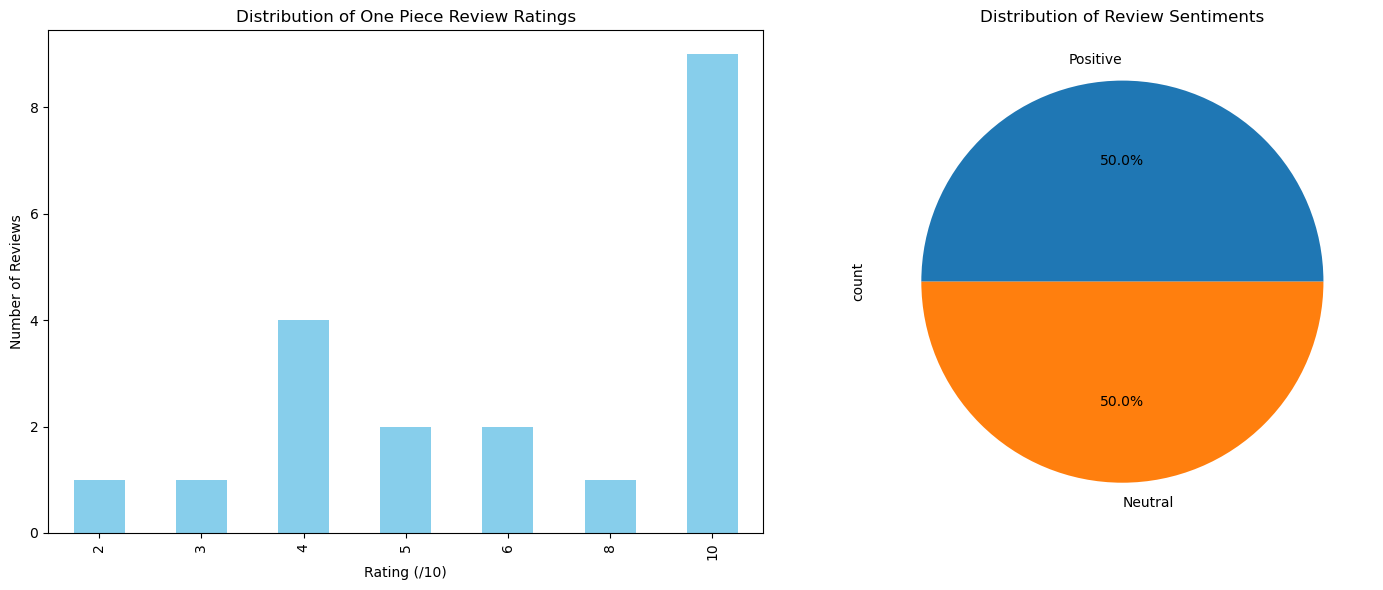

In [7]:
def plot_ratings_and_sentiment(df):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Rating Distribution
    ratings = pd.to_numeric(df["rating"], errors="coerce").dropna()
    if not ratings.empty:
        ratings.value_counts().sort_index().plot(kind="bar", color="skyblue", ax=ax1)
        ax1.set_title("Distribution of One Piece Review Ratings")
        ax1.set_xlabel("Rating (/10)")
        ax1.set_ylabel("Number of Reviews")
    
    # Plot 2: Sentiment Distribution
    sentiment_counts = df["sentiment"].value_counts()
    sentiment_counts.plot(kind="pie", autopct="%1.1f%%", ax=ax2)
    ax2.set_title("Distribution of Review Sentiments")
    
    plt.tight_layout()
    plt.show()

# Create visualizations
plot_ratings_and_sentiment(df)

## 5. Additional Analysis: Correlation between Ratings and Sentiment

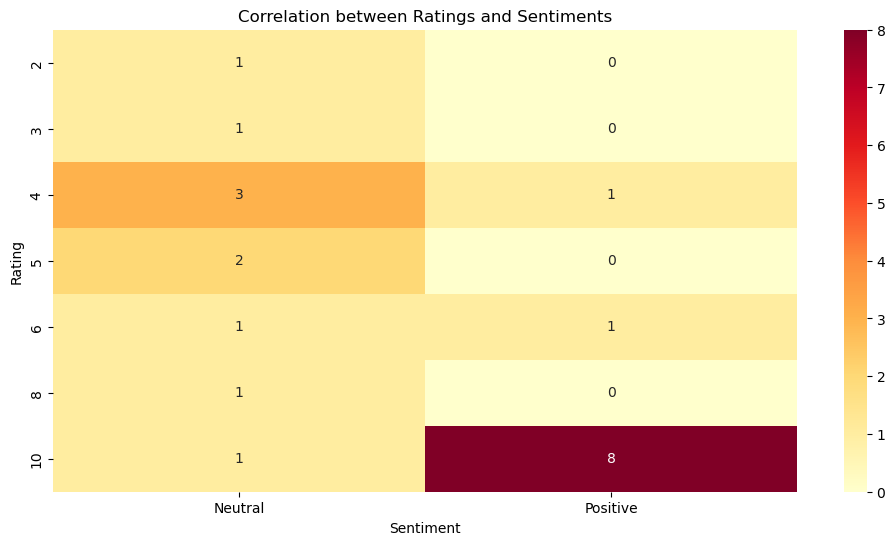

Summary Statistics:
Average polarity score: 0.119
Average rating: 7.05
Sentiment distribution:
sentiment
Positive    50.0
Neutral     50.0
Name: proportion, dtype: float64


In [10]:
def analyze_rating_sentiment_correlation(df):
    # Convert ratings to numeric
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
    
    # Create a cross-tabulation of ratings and sentiments
    rating_sentiment = pd.crosstab(df["rating"], df["sentiment"])
    
    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(rating_sentiment, annot=True, fmt="d", cmap="YlOrRd")
    plt.title("Correlation between Ratings and Sentiments")
    plt.xlabel("Sentiment")
    plt.ylabel("Rating")
    plt.show()
    
    # Print summary statistics
    print("Summary Statistics:")
    print(f"Average polarity score: {df['polarity'].mean():.3f}")

    # print(f"Average polarity score: {df["polarity"].mean():.3f}")
    print(f"Average rating: {df['rating'].mean():.2f}")
    print("Sentiment distribution:")
    print(df["sentiment"].value_counts(normalize=True).round(3) * 100)

# Analyze correlation
analyze_rating_sentiment_correlation(df)